In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.io import loadmat
from scipy.ndimage import convolve
from scipy.misc import imread,imresize

car1 = cv2.imread('img/cardinal1.jpg')
car1 = cv2.resize(car1, (200, 200))
car1_gray = cv2.cvtColor(car1, cv2.COLOR_BGR2GRAY)


filepath = {'cardinal1':'img/cardinal1.jpg','cardinal2':'img/cardinal2.jpg','leopard1':'img/leopard1.jpg',
            'leopard2':'img/leopard2.jpg','panda1':'img/panda1.jpg','panda2':'img/panda2.jpg'}
#print(filepath)
procImg = dict()
for k,v in filepath.items():
    img = None
    img = imread(v,mode='L')
    img = imresize(img,(200,200))
    procImg[k] = img



C:\Users\ashis\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\ashis\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


In [39]:
lmFilterBank =  loadmat('filter/filters.mat')
lmFilter = lmFilterBank["F"]
print(lmFilter.shape)

(49, 49, 48)


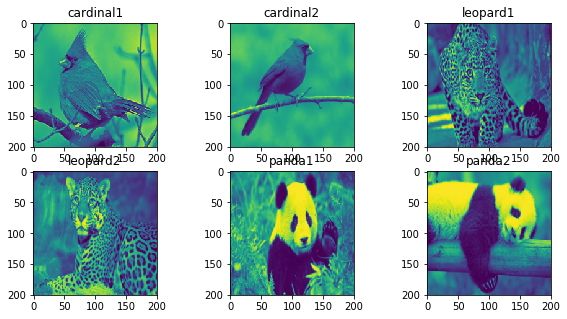

In [44]:
z = 1
for k,v in sorted(procImg.items()):
        plt.subplot(2,3,z)
        plt.title(k)
        plt.imshow(v)
        z = z + 1
        
imgName = 'outputImg/actualImg.png'
plt.savefig(imgName)

In [45]:
print(lmFilter[:,:,1].shape)
print(procImg['cardinal1'].shape)
#tt = convolve(procImg['cardinal1'],lmFilter[:,:,1])

(49, 49)
(200, 200)


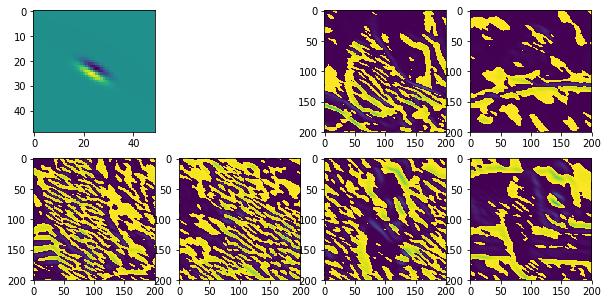

In [46]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(2,4,1)
plt.imshow(lmFilter[:,:,1])
plt.subplot(2,4,3)
plt.imshow(convolve(procImg['cardinal1'],lmFilter[:,:,1]))
plt.subplot(2,4,4)
plt.imshow(convolve(procImg['cardinal2'],lmFilter[:,:,1]))
plt.subplot(2,4,5)
plt.imshow(convolve(procImg['leopard1'],lmFilter[:,:,1]))
plt.subplot(2,4,6)
plt.imshow(convolve(procImg['leopard2'],lmFilter[:,:,1]))
plt.subplot(2,4,7)
plt.imshow(convolve(procImg['panda1'],lmFilter[:,:,1]))
plt.subplot(2,4,8)
plt.imshow(convolve(procImg['panda2'],lmFilter[:,:,1]))
#plt.savefig('img1.png')

C:\Users\ashis\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


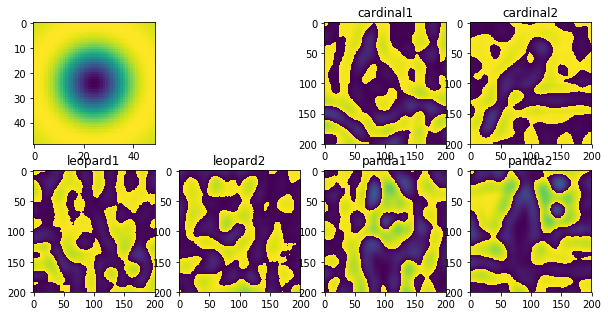

In [47]:
nFilter = lmFilter.shape[2]
for i in range(nFilter):
    z = 3
    plt.subplot(2,4,1)
    plt.imshow(lmFilter[:,:,i])    
    for k,v in sorted(procImg.items()):
        img = None
        img = convolve(v,lmFilter[:,:,i])
        plt.subplot(2,4,z)
        plt.title(k)
        plt.imshow(img)
        z = z + 1
        
    imgName = 'outputImg/resultWithFilter'+str(i)+'.png'
    plt.savefig(imgName)
     
       
        
        
        